# Github link

https://github.com/RaudelVargasUIC/CS_418_Final_Project/blob/main/418_Progress_Report.ipynb

# Project Introduction

The criminal justice system is a complex system to try to understand, and it is difficult to keep up with different parts of the system, unless someone is directly involved within it. Analyzing different trends within data allows us to gain a deeper understanding to this complex system, giving us the ability to understand trends with incarcerations, pick out specific areas that need reform, and hopefully give us a good understanding of areas that need reform.

Prison systems pose complex challenges, even in Illinois. The Illinois prison system is a broken system, facing many issues such as overcrowding, racial bias, offenders likely reoffending after being released (recidivism), and too much money being spent on prisons. Understanding patterns from prison statistics may allow us to find a solution to these issues. Leveraging data science techniques will allows us to uncover trends, hidden insights, and potentially find valuable recommendations to create a more just and effective criminal justice system.

This project utilizes a dataset of Illinois prison statistics, containing information on inmate demographics, type of offesnes, sentence durations, recidivism, and more.

Using a combination of exploratory data analysis, data visualizations, and machine learning, we aim to answer this **critical question**:
* In Illinois, which crimes are the most committed, who commits those crimes, how to the sentences differ based on who committed that crime, and how likely is that crime to be repeated?

# Changes Since Proposal

No changes since proposal.

# Data Preparation

We were able to get about 50 files with data from the Illinois Department of Corrections. We decided to only use the last data set from each year (December 20xx) since it would encompass every offender in that year. Additionally, a lot of the files had the same data, each file having the same offender if their sentencing time falls before the date of the file. (Ex. if an offender got sentenced on 7/1/2010 and their release date was 7/10/2013, then the data for 2011, 2012, and 2013 will have that offender as entry). This would just allow us to work with less repetitive entries when cleaning the data.

The data was originally in excel format, so we created a script that took all of those excel files, converted them to dataframes, appended them to the same dataframe, and then saved it as a csv file (That is the csv file in stored in the path below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip
!pip install --upgrade geopandas

!pip install numpy==1.22.4
!pip install plotly-geo==1.0.0
!pip install geopandas==0.9.0
!pip install pyshp==1.2.10
!pip install shapely==1.7.1
!pip install plotly==5.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing insta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.1
    Uninstalling geopandas-0.14.1:
      Successfully uninstalled geopandas-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.15.0 requires geopandas>=0.12.2, but you have geopandas 0.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyshp: filename=pyshp-1.2.10-p

In [ ]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

csv_files = glob.glob("/content/drive/MyDrive/CS 418/Final Combined CSV/*.{}".format('csv'))

df = pd.DataFrame()

for csv in csv_files:
  df = df.append(pd.read_csv(csv))

<ipython-input-4-961c16ab7776>:16: DtypeWarning: Columns (2,6,9,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df.append(pd.read_csv(csv))
<ipython-input-4-961c16ab7776>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(csv))


In [ ]:
df

,IDOC #,Name,Date of Birth,Sex,Race,Veteran Status,Current Admission Date,Admission Type,Parent Institution,Projected Mandatory Supervised Release (MSR) Date3,Projected Discharge Date3,Custody Date,Sentence Date,Crime Class,Holding Offense,Sentence Years,Sentence Months,Truth in Sentencing,Sentencing County
0,A00090,"BUELL, JOHN JR",6031944.0,Male,White,No,1092002.0,Discharged & recommitted,Pontiac CC,NaN,NaN,2001-12-19 00:00:00,2001-12-19 00:00:00,Class X,PREDATORY CRIMINAL SEXUAL ASSAULT,0013,0.0,85%,Winnebago
1,A00147,"MCCUTCHEON, JOHN",6141949.0,Male,White,Yes,2161983.0,Discharged & recommitted,Menard CC,NaN,NaN,1983-21-51 00:00:00,1983-21-51 00:00:00,Class X,RAPE,0050,0.0,Day-for-Day,Jasper
2,A00360,"BELL, HOWARD",12181946.0,Male,White,No,2261988.0,Discharged & recommitted,Stateville CC,NaN,NaN,1988-22-31 00:00:00,1988-22-31 00:00:00,Class X,ARMED ROBBERY,0060,0.0,Day-for-Day,Cook
3,A01054,"TIPTON, DARNELL",3251954.0,Male,Black,No,12231988.0,"Parole violator, New sentence",Stateville CC,NaN,NaN,1987-80-71 00:00:00,1987-80-71 00:00:00,Class X,AGG CRIM SEX ASSAULT/WEAPON,0060,0.0,Day-for-Day,Cook
4,A01072,"BRISBON, HENRY",1121956.0,Male,Black,No,2221974.0,Direct from court,Pontiac CC,NaN,NaN,1982-22-41 00:00:00,1982-22-41 00:00:00,Murder,MURDER/INTENT TO KILL/INJURE,LIFE,NaN,Day-for-Day,Will
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792155,Y44037,"SERVIN, ROBERT C.",1995-08-21 00:00:00,Male,White,No,2020-12-18 00:00:00,Direct from court,Stateville,2022-03-18 00:00:00,2024-03-18 00:00:00,2020-11-09 00:00:00,2020-11-09 00:00:00,Class 2,POSSESSION OF STOLEN FIREARM,0003,00,Day-for-Day,Woodford
792156,Y44038,"BOGNER, NICHOLAS",1998-10-22 00:00:00,Male,White,No,2020-12-18 00:00:00,Direct from court,Stateville,2022-10-21 00:00:00,2024-10-21 00:00:00,2020-11-30 00:00:00,2020-11-30 00:00:00,Class 2,BURGLARY,0004,00,Day-for-Day,Woodford
792157,Y44039,"SANDERS, ROBERT R.",1971-08-28 00:00:00,Male,White,No,2020-12-18 00:00:00,Direct from court,Menard,2028-04-01 00:00:00,2030-04-01 00:00:00,2020-11-18 00:00:00,2020-11-18 00:00:00,Class 1,AGG ROBBERY/INDICATE ARM W/FIR,0015,00,Day-for-Day,Johnson
792158,Y44040,"BEASLEY, JAMES R.",1965-07-16 00:00:00,Male,Black,No,2020-12-18 00:00:00,Direct from court,Menard,2022-06-10 00:00:00,2023-06-10 00:00:00,2020-11-19 00:00:00,2020-11-19 00:00:00,Class 3,POSSESSION OF METH< 5 GRAMS,0004,00,Day-for-Day,Massac


# Exploratory Data Analysis

In [ ]:
df_eda = df[["Sex", "Race", "Holding Offense"]]
df_eda = df_eda.groupby(["Sex", "Race"]).size().reset_index(name='Count')
total_counts = df_eda.groupby("Sex")['Count'].transform("sum")
df_eda['Percentage'] = (df_eda['Count']/total_counts)*100
df_eda = df_eda.iloc[1:, :]
df_eda.sort_values(by="Percentage", ascending=False)

df_eda

,Sex,Race,Count,Percentage
1,Female,American Indian,251,0.546412
2,Female,Asian,257,0.559474
3,Female,Bi-Racial,178,0.387496
4,Female,Black,19713,42.914054
5,Female,Hispanic,3359,7.312348
6,Female,Unknown,78,0.169801
7,Female,White,22100,48.110414
8,Male,American Indian,859,0.115114
9,Male,Asian,2415,0.323631
10,Male,Bi-Racial,248,0.033234


Text(0, 0.5, 'Percentage of Popultion')

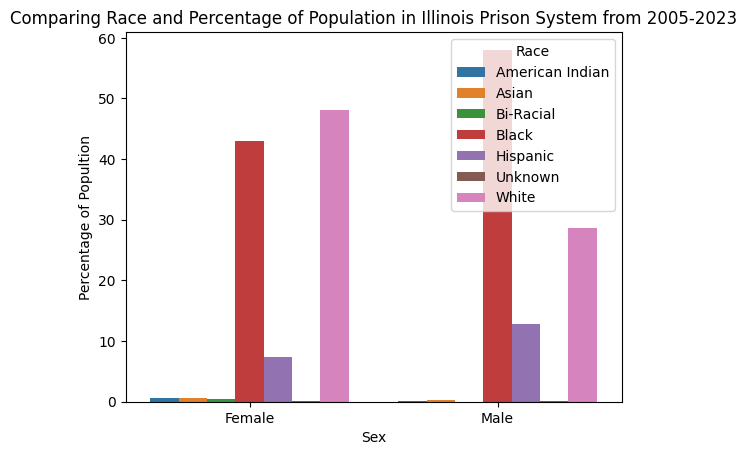

In [ ]:
ax = sns.barplot(data=df_eda, x="Sex", y="Percentage", hue="Race")

legend = ax.legend(title="Race")
ax.set_title("Comparing Race and Percentage of Population in Illinois Prison System from 2005-2023")
ax.set_xlabel("Sex")
ax.set_ylabel("Percentage of Popultion")

**Data Analysis Graph 1 Thoughts**

From the data, it seems like Blacks and Whites dominate the percentage of people being incarcerated, with Hispanics the next highest group. It is very interesting that these three groups are miles above the other groups, which are barely even visible in the data.

In [ ]:
df_eda2 = df[["Sex", "Sentence Date"]]
df_eda2["Sentence Date"] = pd.to_datetime(df_eda2["Sentence Date"], errors="coerce")
df_eda2 = df_eda2[df_eda2["Sentence Date"].notna()]

df_eda2["Year"] = df_eda2["Sentence Date"].dt.year
df_eda2 = df_eda2[df_eda2["Year"] >= 2005]
df_eda2 = df_eda2.sort_values(by="Year")

df_eda2 = df_eda2.groupby(["Year"]).size().reset_index(name='Count')

df_eda2

,Year,Count
0,2005,34942
1,2006,40368
2,2007,38989
3,2008,36799
4,2009,36361
5,2010,32132
6,2011,22830
7,2012,6506
8,2013,8540
9,2014,12016


[Text(0, 0, '2005'),
 Text(1, 0, '2006'),
 Text(2, 0, '2007'),
 Text(3, 0, '2008'),
 Text(4, 0, '2009'),
 Text(5, 0, '2010'),
 Text(6, 0, '2011'),
 Text(7, 0, '2012'),
 Text(8, 0, '2013'),
 Text(9, 0, '2014'),
 Text(10, 0, '2015'),
 Text(11, 0, '2016'),
 Text(12, 0, '2017'),
 Text(13, 0, '2018'),
 Text(14, 0, '2019'),
 Text(15, 0, '2020'),
 Text(16, 0, '2021'),
 Text(17, 0, '2022'),
 Text(18, 0, '2023')]

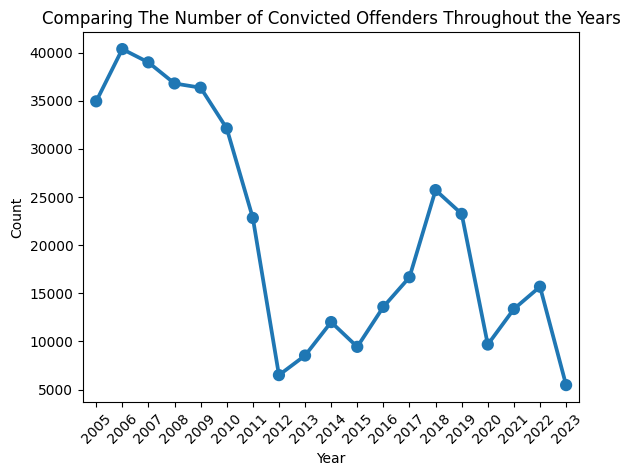

In [ ]:
ax = sns.pointplot(data=df_eda2, x="Year", y="Count")

ax.set_title("Comparing The Number of Convicted Offenders Throughout the Years")
ax.set_xticklabels(labels=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=45)

**Data Analysis Graph 2 Thoughts**

From this graph, it seems like the early 2000s had a very high incarceration number, which then eventually dropped down a lot in 2012. Now, we are seeing an upward rise again. It would be interesting to see why this dip occured. Was there malformatting in our original data? Or is this actually what happened? We would have to go through our full data sheet to see.

Note: 2023's data is only up to June (that was the most recent data available for 2023).

# Data Visualizations

# Kacper's Visualization

**Hypothesis to test**: Crimes that relate to harming others are more likely to occur in more populated counties, while non-harming crimes are more likely to be committed in less populated counties.

We thought this hypothesis would be interesting to pursure because we were curious to see what the number one committed crime was in each county. We were also curious to see that if you have a county with a larger population, are non-harming crimes more common than harming crimes.

What the graph shows is the most common crimes per county, and a majority of the lower populated counties (towards the middle and south of the state) are burglary or drug related, while in some of the counties, like Cook county, have harmful crimes as their most common.

In [ ]:
# Read in the data to get the FIPS
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample = df_sample[df_sample['STNAME'] == 'Illinois']

df_sample = df_sample.sort_values(by="CTYNAME", ascending=True)
fips = df_sample['FIPS'].tolist()

In [ ]:
county_crimes = df[["Sentencing County", "Holding Offense", "Sentence Date"]]

# Changing date to be >= 2005
county_crimes["Sentence Date"] = pd.to_datetime(county_crimes["Sentence Date"], errors="coerce")
county_crimes = county_crimes[county_crimes["Sentence Date"].notna()]
county_crimes["Year"] = county_crimes["Sentence Date"].dt.year
county_crimes = county_crimes[county_crimes["Year"] >= 2005]


# Removing duplicate counties, based on inconsistencies in spelling in CSV
county_crimes = county_crimes[county_crimes["Sentencing County"] != "Out of state"]
county_crimes = county_crimes[county_crimes["Sentencing County"] != "Dupage"]
county_crimes = county_crimes[county_crimes["Sentencing County"] != "Dekalb"]
county_crimes = county_crimes[county_crimes["Sentencing County"] != "LaSalle"]

# Grouping by [county, crime], and then seeing the count for each crime
county_crimes = county_crimes.groupby(["Sentencing County", "Holding Offense"]).size().reset_index(name="Count")
county_crimes = county_crimes.sort_values("Count", ascending=False).drop_duplicates("Sentencing County")
county_crimes = county_crimes.sort_values("Sentencing County", ascending=True)

values = county_crimes["Holding Offense"].tolist()

county_crimes

,Sentencing County,Holding Offense,Count
133,Adams,BURGLARY,173
390,Alexander,BURGLARY,41
571,Bond,POSSESSION OF METH< 5 GRAMS,66
827,Boone,PREDATORY CRIMINAL SEXUAL ASSAULT,101
881,Brown,BURGLARY,8
...,...,...,...
20717,Whiteside,BURGLARY,225
21291,Will,MANU/DEL 01-15 GRAMS COCAINE,617
21593,Williamson,BURGLARY,71
21973,Winnebago,BURGLARY,712


In [ ]:
!pip install gitly==1.0.1

In [ ]:
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


In [ ]:
fig = ff.create_choropleth(
    values= values,
    fips=fips,
    scope=['Illinois'],
    title='Crime Heatmap of Illinois Counties',
    show_state_data = True,
    legend_title= 'Types of Crimes Committed per County (Since 2005)'
    # colorscale=colorscale,
)
fig.update_layout(legend=dict(
    orientation="v",
    yanchor="top",
    y=1,
    xanchor="right",  # changed
    x= .35,
    borderwidth = 1,
    bordercolor = 'black',
    ))
fig.show()

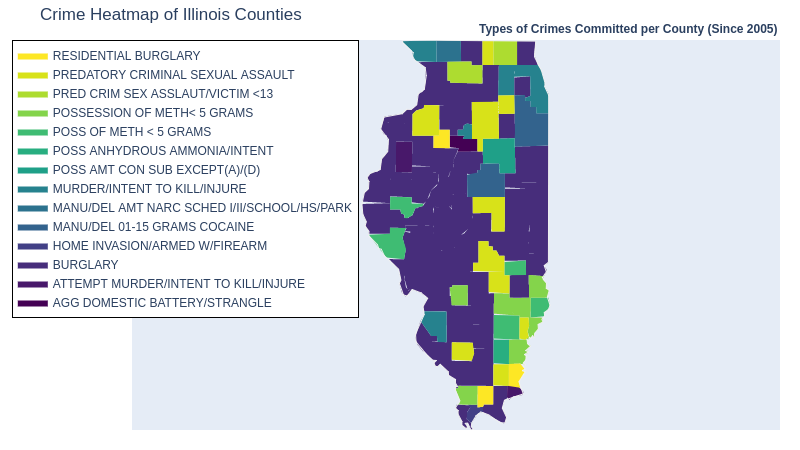

In [ ]:
# THIS CODE IS TO SHOW IT IN GITHUB BC PLOTLY GRAPHS DONT SHOW FOR SOME REASON
gitly.show(fig)

# Kacper Visualization B

This plot will be exploring average age of people committing crimes in each county. We saw the most common crimes, now we want to see who is committing those crimes in each county.

In [ ]:
from datetime import datetime

age_county = df[["Sentencing County", "Date of Birth", "Sentence Date"]]
# Changing date to be >= 2005
age_county["Sentence Date"] = pd.to_datetime(age_county["Sentence Date"], errors="coerce")
age_county = age_county[age_county["Sentence Date"].notna()]
age_county["Year"] = age_county["Sentence Date"].dt.year
age_county = age_county[age_county["Year"] >= 2005]

# Changing the DOB to be in Datatime format
age_county["Date of Birth"] = pd.to_datetime(age_county["Date of Birth"], errors="coerce")
age_county = age_county[age_county["Date of Birth"].notna()]

# Get the age of offenders by doing current date - dob
current_date = datetime.now()
age_county["Age"] = ((current_date - age_county['Date of Birth']).dt.days/365).astype(int)

#Getting average and number of crimes per county
age_county = age_county.groupby("Sentencing County").agg({'Age': 'mean', 'Year': 'count'}).reset_index()

age_county

,Sentencing County,Age,Year
0,Adams,43.875495,3534
1,Alexander,46.134860,393
2,Bond,42.506241,721
3,Boone,43.427439,2019
4,Brown,45.150000,80
...,...,...,...
101,Whiteside,44.605760,2118
102,Will,45.410955,12067
103,Williamson,46.207813,1280
104,Winnebago,44.907928,13446


In [ ]:
fig = px.scatter(age_county, x='Age', y='Year', size='Age',
                 color='Sentencing County',
                 labels={'Age': 'Average Age of Offenders', 'Year': 'Number of Crimes'},
                 title='Average Age and Number of Crimes by Sentencing County',
                 hover_data=['Age', 'Year', 'Sentencing County'])

fig.update_layout(
    xaxis_title='Number of Crimes',
    yaxis_title='Average Age of Offenders',
    showlegend=True
)

fig.show()

# Raudel's Visualization

Hypothesis to test: Minorities are likely to have a longer average sentence period for crimes than non-minorities.

We thought this was an interesting hypothesis to test because we believed that there is a lot of racial disparity when it comes to sentencing times for certain races. There have been multiple articles and movements trying to bring up the harshness in prison sentences for minorities compared to non-minorities, especially in lower level crimes (i.e. non-murder crimes).

This data, for the top 5 crimes committed in Illinois from 2005-2023, doesn't really support that claim, however. It looks that the average length of a sentence for a crime doesn't differ based on race.

In [ ]:
# Get the top ten crimes by count
top_five_crimes = df[["Holding Offense"]]
top_five_crimes = top_five_crimes.groupby(["Holding Offense"]).size().reset_index(name="Count")
top_five_crimes = top_five_crimes.sort_values(by="Count", ascending=False)
top_five_crimes = top_five_crimes.head(5)
# top_ten_crimes

top_five_list = top_five_crimes["Holding Offense"].tolist()
top_five_list

['MURDER/INTENT TO KILL/INJURE',
 'BURGLARY',
 'POSS AMT CON SUB EXCEPT(A)/(D)',
 'RESIDENTIAL BURGLARY',
 'PREDATORY CRIMINAL SEXUAL ASSAULT']

In [ ]:
pop_offenses = df[["Sentence Years", "Holding Offense", "Race"]]

# change Sentence Years to be ints and LIFE = 90
pop_offenses["Sentence Years"] = np.where(pop_offenses["Sentence Years"] == "LIFE", 90, pop_offenses["Sentence Years"])
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "SDP"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "DEATH"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "PEND"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != " "]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"].notna()]

pop_offenses["Sentence Years"] = pop_offenses["Sentence Years"].astype(int)

# Grouping by Race and Holding Offense
pop_offenses = pop_offenses.groupby(["Race", "Holding Offense"])["Sentence Years"].mean().reset_index(name="Average")
pop_offenses = pop_offenses[pop_offenses["Holding Offense"].isin(top_five_list)]

pop_offenses

,Race,Holding Offense,Average
60,American Indian,BURGLARY,6.537500
127,American Indian,MURDER/INTENT TO KILL/INJURE,58.152381
135,American Indian,POSS AMT CON SUB EXCEPT(A)/(D),1.736842
145,American Indian,PREDATORY CRIMINAL SEXUAL ASSAULT,13.333333
151,American Indian,RESIDENTIAL BURGLARY,8.750000
297,Asian,BURGLARY,4.764706
411,Asian,MURDER/INTENT TO KILL/INJURE,47.212237
417,Asian,POSS AMT CON SUB EXCEPT(A)/(D),1.727273
446,Asian,PREDATORY CRIMINAL SEXUAL ASSAULT,14.074074
455,Asian,RESIDENTIAL BURGLARY,6.074627


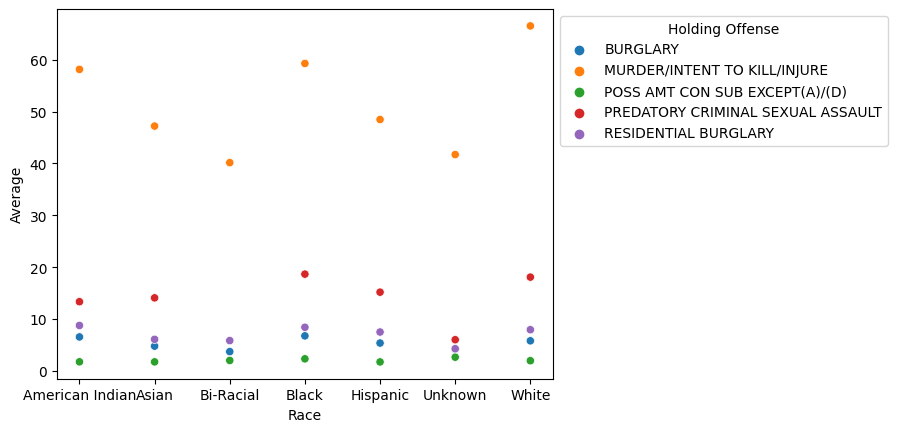

In [ ]:
ax = sns.scatterplot(data=pop_offenses, hue="Holding Offense", y="Average", x="Race")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Raudel's Visualization B

In [ ]:
temp = df["Crime Class"].unique()
temp

array(['Class X', 'Murder', 'Class 4', 'Class 3', 'Class 2', 'Class 1',
       'Unclassified', ' ', 'Missing', nan, 'Class M'], dtype=object)

In [ ]:
crime_classes = ['Class 4', 'Class 3', 'Class 2', 'Class 1']

pop_offenses = df[["Sentence Years", "Crime Class", "Race"]]

pop_offenses["Sentence Years"] = np.where(pop_offenses["Sentence Years"] == "LIFE", 90, pop_offenses["Sentence Years"])
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "SDP"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "DEATH"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != "PEND"]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"] != " "]
pop_offenses = pop_offenses[pop_offenses["Sentence Years"].notna()]

pop_offenses["Sentence Years"] = pop_offenses["Sentence Years"].astype(int)

# Grouping by Race and Holding Offense
pop_offenses = pop_offenses.groupby(["Race", "Crime Class"])["Sentence Years"].mean().reset_index(name="Average")
pop_offenses = pop_offenses[pop_offenses["Crime Class"].isin(crime_classes)]

pop_offenses

,Race,Crime Class,Average
0,American Indian,Class 1,8.635659
1,American Indian,Class 2,5.619565
2,American Indian,Class 3,3.389381
3,American Indian,Class 4,2.042017
6,Asian,Class 1,7.265985
7,Asian,Class 2,4.670792
8,Asian,Class 3,3.222222
9,Asian,Class 4,1.647799
13,Bi-Racial,Class 1,7.580000
14,Bi-Racial,Class 2,3.881818


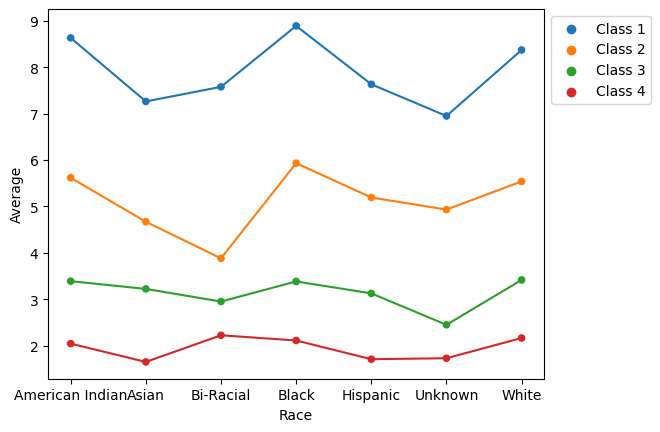

In [ ]:
ax = sns.scatterplot(data=pop_offenses, hue="Crime Class", y="Average", x="Race")
sns.lineplot(data=pop_offenses,hue="Crime Class", y="Average", x="Race",legend = False ,ax=ax)

ax.legend(loc = "upper left", bbox_to_anchor=(1, 1))


Raudel's Visualization B

# Eddie's Visualization

**Hypothesis to test**: Counties with higher populations have more crimes committed in comparison to lower populated counties.

We wanted to pursue this hypothesis mainly to see what area of Illinois has the highest number of crimes committed. We believed that higher populated counties, which have big cities, popular stores, etc, would have more chance of a crime committed. The graph does support that idea, with counties neighboring Chicago being some of the highest counties on the list.

In [ ]:
# Read in the data to get the FIPS
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample = df_sample[df_sample['STNAME'] == 'Illinois']

df_sample = df_sample.sort_values(by="CTYNAME", ascending=True)
fips = df_sample['FIPS'].tolist()

# Read in IDOC data to get the county, and all incarcerations >= 2005
idoc_sample = df[["Sentencing County", "Sentence Date"]]
idoc_sample["Sentence Date"] = pd.to_datetime(idoc_sample["Sentence Date"], errors="coerce")
idoc_sample = idoc_sample[idoc_sample["Sentence Date"].notna()]

idoc_sample["Year"] = idoc_sample["Sentence Date"].dt.year
idoc_sample = idoc_sample[idoc_sample["Year"] >= 2005]

idoc_sample = idoc_sample.groupby(["Sentencing County"]).size().reset_index(name="Count")
idoc_sample = idoc_sample[idoc_sample["Sentencing County"] != "Out of state"]
idoc_sample = idoc_sample[idoc_sample["Sentencing County"] != "Dupage"]
idoc_sample = idoc_sample[idoc_sample["Sentencing County"] != "Dekalb"]
idoc_sample = idoc_sample[idoc_sample["Sentencing County"] != "LaSalle"]

idoc_sample = idoc_sample.sort_values(by="Sentencing County", ascending=True)
# counties = idoc_sample["Sentencing County"].tolist()
count = idoc_sample["Count"].tolist()

# Now counties, fips, count will be lists in order sorted by Counties


In [ ]:
fig2  = ff.create_choropleth(
    values= count,
    fips=fips,
    scope=['Illinois'],
    title='Crime Heatmap of Illinois Counties',
    show_state_data = True,
    legend_title= 'Number of Crimes Committed per County (Since 2005)'
    # colorscale=colorscale,
)
fig2 .show()

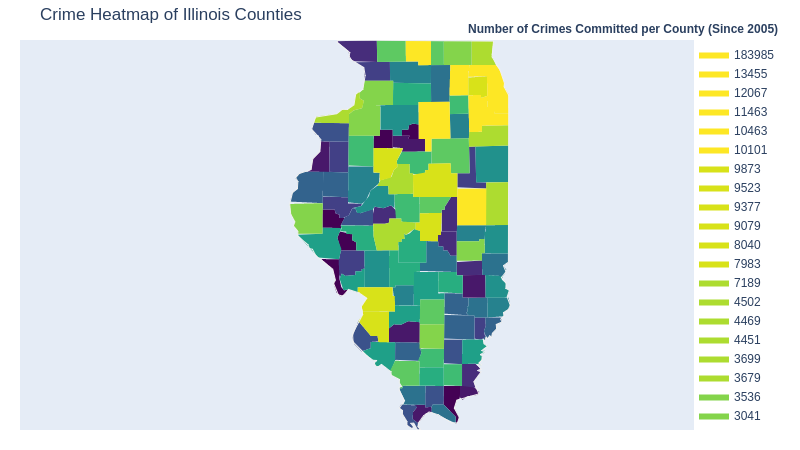

In [ ]:
gitly.show(fig2 )

# Thoong's Visualization

**Hypothesis to test:** There are certain crimes that are committed where jail time does not result in resolution to the problem.

We chose to pursue this hypothesis because since prison populations as a whole are increasing, not just in Illinois, there must be some crimes that are being committed repetitively. If we could crack down on what some of those crimes are in Illinois, we could potentially come up with solutions that don't result in jail time, instead, some sort of alternative punishment.

In [ ]:
# First, I want to find the top ten Holding Offenses based on count
readmitted = df[["Holding Offense", "Admission Type"]]

readmitted = readmitted.groupby(["Holding Offense", "Admission Type"]).size().reset_index(name="Count")
total_counts = readmitted.groupby("Holding Offense")['Count'].transform("sum")
readmitted["Percentage"] = (readmitted["Count"] / total_counts) * 100

readmitted = readmitted[readmitted["Admission Type"].str.lower() == "discharged & recommitted"]
readmitted = readmitted[readmitted["Count"] > 100]
readmitted = readmitted.sort_values(by=["Percentage"], ascending=False)

top_ten_readmitted = readmitted.head(10)
top_ten_readmitted

,Holding Offense,Admission Type,Count,Percentage
4901,DRIVING W/ SUSPEND/REVOKE LICENSE 10-14,Discharged & recommitted,585,66.326531
5058,DUI/6+,Discharged & recommitted,158,61.960784
3295,ATTEMPT MANU/DEL OTHER AMT NARC,Discharged & recommitted,122,61.928934
4941,DRIVING W/ SUSPEND/REVOKE LICENSE 4-9,Discharged & recommitted,919,61.471572
4910,DRIVING W/ SUSPEND/REVOKE LICENSE 15+,Discharged & recommitted,245,60.945274
6655,MANU/DEL HEROIN/SCHOOL/PUB HOUS/PARK,Discharged & recommitted,249,58.041958
8580,REVOKED/SUSPENDED 2ND DUI,Discharged & recommitted,954,54.545455
4888,DRIVING W/ REVOKE/SUSPEND LICENSE 2ND+,Discharged & recommitted,632,53.468697
2343,ARMED HABITUAL CRIMINAL,Discharged & recommitted,4203,53.189066
3121,ATTEMPT BURGLARY,Discharged & recommitted,1136,53.034547


[Text(0, 0, 'DRIVING W/ SUSPEND/REVOKE LICENSE 10-14'),
 Text(0, 1, 'DUI/6+'),
 Text(0, 2, 'ATTEMPT MANU/DEL OTHER AMT NARC'),
 Text(0, 3, 'DRIVING W/ SUSPEND/REVOKE LICENSE 4-9'),
 Text(0, 4, 'DRIVING W/ SUSPEND/REVOKE LICENSE 15+'),
 Text(0, 5, 'MANU/DEL HEROIN/SCHOOL/PUB HOUS/PARK'),
 Text(0, 6, 'REVOKED/SUSPENDED 2ND DUI'),
 Text(0, 7, 'DRIVING W/ REVOKE/SUSPEND LICENSE 2ND+'),
 Text(0, 8, 'ARMED HABITUAL CRIMINAL'),
 Text(0, 9, 'ATTEMPT BURGLARY')]

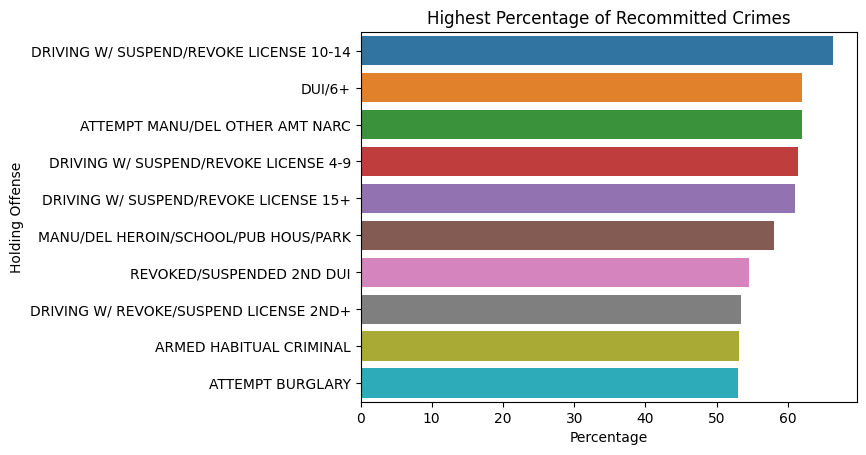

In [ ]:
ax = sns.barplot(data=top_ten_readmitted, y="Holding Offense", x="Percentage")
ax.set_title("Highest Percentage of Recommitted Crimes")

x_labels = top_ten_readmitted["Holding Offense"].tolist()

ax.set_yticklabels(labels=x_labels)

# Eddie's Visualization B

In [ ]:
# df['Admission Type'] = df['Admission Type'].str.lower()

# discharged_recommitted = df[df["Admission Type"] == "discharged & recommitted"]
# total_count_all_crimes = discharged_recommitted.groupby("Sentencing County").size().reset_index(name="Total Count All Crimes")

# readmitted2 = df.groupby(["Sentencing County", "Admission Type"]).size().reset_index(name="Count")
# readmitted2 = readmitted2[(readmitted2["Admission Type"] == "discharged & recommitted") & (readmitted2["Count"] > 100)]
# readmitted2 = pd.merge(readmitted2, total_count_all_crimes, on="Sentencing County")

# readmitted2["Percentage"] = (readmitted2["Count"] / readmitted2["Total Count All Crimes"]) * 100

# top_ten_readmitted = readmitted2.sort_values(by="Count", ascending=False).head(10)
# print(top_ten_readmitted)




df['Admission Type'] = df['Admission Type'].str.lower()
discharged_recommitted = df[["Sentencing County", "Admission Type"]]
discharged_recommitted = discharged_recommitted[discharged_recommitted["Admission Type"] == "discharged & recommitted"]
discharged_recommitted = discharged_recommitted.groupby(["Sentencing County", "Admission Type"]).size().reset_index(name="Count")
total_counts = discharged_recommitted.groupby("Admission Type")['Count'].transform("sum")
discharged_recommitted["Percentage"] = (discharged_recommitted["Count"] / total_counts) * 100
discharged_recommitted = discharged_recommitted.sort_values(by=["Percentage"], ascending=False)


top_ten_readmitted = discharged_recommitted.head(10)
top_ten_readmitted

,Sentencing County,Admission Type,Count,Percentage
15,Cook,discharged & recommitted,123953,52.491986
105,Winnebago,discharged & recommitted,7455,3.157066
103,Will,discharged & recommitted,6723,2.847076
9,Champaign,discharged & recommitted,6585,2.788635
57,Macon,discharged & recommitted,5868,2.484998
75,Peoria,discharged & recommitted,5759,2.438838
46,Kane,discharged & recommitted,5429,2.299089
66,McLean,discharged & recommitted,4980,2.108945
51,Lake,discharged & recommitted,4778,2.023402
86,Sangamon,discharged & recommitted,4613,1.953527


In this visualization,the x-axis represents the "Sentencing County," the y-axis represents the "Readmission Count," and each violin plot displays the distribution of readmission data per specific county.

In [ ]:
fig = px.scatter(top_ten_readmitted, x= 'Sentencing County',y = 'Count',size  = 'Percentage',
                 color = "Percentage", hover_name= 'Sentencing County',
                 title = 'Top Counties with the Most Discharged & Recommitted Crimes in Illinois',
                 labels={'Count': 'Number of Discharged & Recommitted Crimes', 'Total Count': 'Total Count'},
                 size_max=60
                 )



fig.show()

Eddie's Visualization B

# Thoong's Visualization B

Thoong's Visualization B

In this visualization we weill explore more about the age distribution of people who are recommitting crimes.


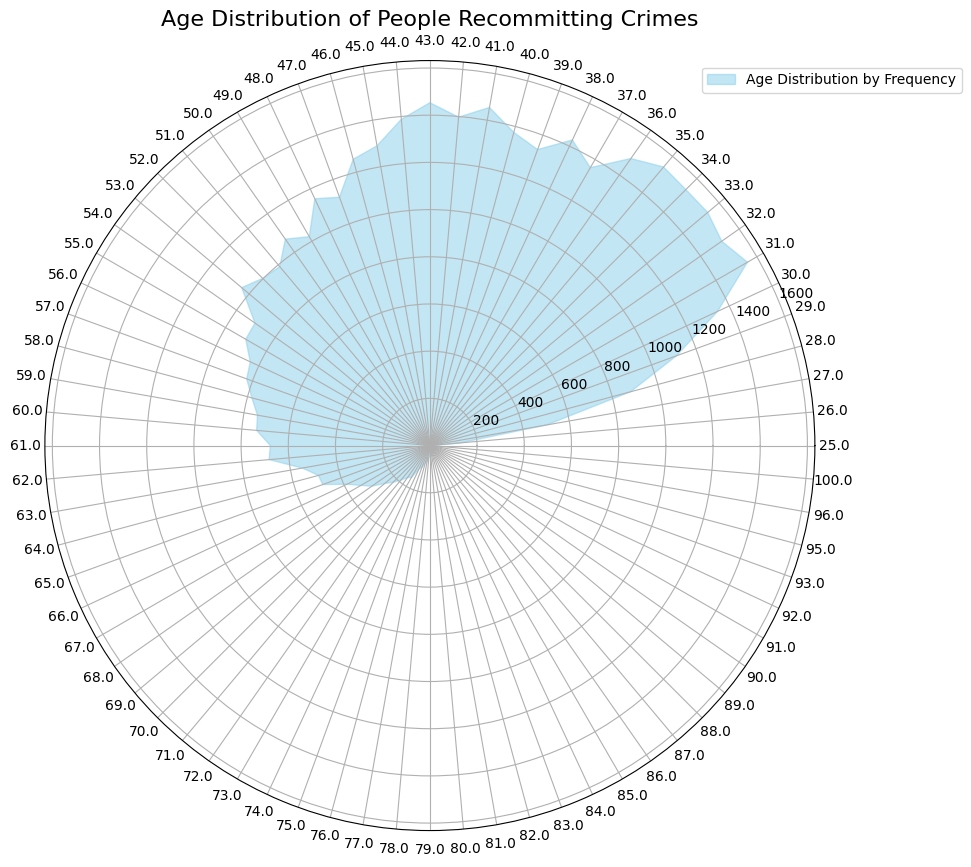

In [ ]:
df['Birth Year'] = df['Date of Birth'].astype(str).str[-4:]
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')
current_year = 2023
df['Age'] = current_year - df['Birth Year']

df = df.dropna(subset=['Birth Year'])
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]
age_distribution = df['Age'].value_counts().sort_index()

categories = age_distribution.index
values = age_distribution.values

num_categories = len(categories)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.5)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([str(age) for age in categories], fontsize=10)
ax.set_title('Age Distribution of People Recommitting Crimes', fontsize=16)
ax.legend(['Age Distribution by Frequency'], loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

In [ ]:
# Create the funnel chart
df['Birth Year'] = df['Date of Birth'].astype(str).str[-4:]
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')
current_year =2023
df['Age'] = current_year - df['Birth Year']
df = df.dropna(subset=['Birth Year'])
df = df[(df['Age'] >= 0) & (df['Age'] <= 110)]
age_distribution = df['Age'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Funnel(
    name='Age Distribution',
    y=age_distribution.index.astype(str),
    x=age_distribution.values,
    textinfo="value+percent initial",
    marker=dict(color='teal')
))

fig.update_layout(
    title='Funnel Chart - Age Distribution of People Recommitting Crimes',
    xaxis_title='Count',
    yaxis_title='Age',
    showlegend=False
)

fig.show()

NameError: ignored

# Quang's Visualization
**Hypothesis to test**: There is an increasing percentage of former veterans that are ending up behind bars due to inadequate resources towards that group.

This is a hypothesis we chose to pursue because a large number of former veterans do not have the support for a normal life after their sacrifices for this country. A lot of them end up on the street without any support, and a majority of veterans deal with emotions due to their time serving. If there is an increase in veterans behind bars, resources supporting veterans must be allocated, instead of allocating more for prisons.


In [ ]:
veteran = df[["Veteran Status", "Holding Offense"]]
veteran = veteran.groupby(["Holding Offense", "Veteran Status"]).size().reset_index(name="Count")

total_counts = veteran.groupby("Holding Offense")['Count'].transform("sum")
veteran["Percentage"] = (veteran["Count"] / total_counts) * 100

veteran = veteran[veteran["Veteran Status"] == "Yes"]
veteran = veteran.sort_values(by="Percentage", ascending=False)
veteran = veteran[veteran["Count"] > 25]

veteran_top_five = veteran.head(5)
veteran_top_five

,Holding Offense,Veteran Status,Count,Percentage
378,AGG CRIM SEX ASSAULT/VICTIM <13,Yes,149,16.592428
3628,SEXUALLY DANGEROUS PERSON,Yes,381,14.174107
1495,CHILD PORN/FILM/TAPE/PHOTO/ACT,Yes,46,13.939394
1922,DEVIATE SEXUAL ASSAULT,Yes,29,13.302752
1826,CRIM SEX ASSAULT/FORCE/2ND+,Yes,34,11.184211


In [ ]:
veteran2 = df[["Veteran Status", "Sentence Years", "Sentence Date"]]

# Getting rid of the strings in Sentence Years, and then converting the ints to be type int
veteran2["Sentence Years"] = np.where(veteran2["Sentence Years"] == "LIFE", 90, veteran2["Sentence Years"])
veteran2 = veteran2[veteran2["Sentence Years"] != "SDP"]
veteran2 = veteran2[veteran2["Sentence Years"] != "DEATH"]
veteran2 = veteran2[veteran2["Sentence Years"] != "PEND"]
veteran2 = veteran2[veteran2["Sentence Years"] != " "]
veteran2 = veteran2[veteran2["Sentence Years"].notna()]
veteran2 = veteran2[veteran2["Veteran Status"].notna()]

veteran2["Sentence Years"] = veteran2["Sentence Years"].astype(int)

# making the minimum year 2005
veteran2["Sentence Date"] = pd.to_datetime(veteran2["Sentence Date"], errors="coerce")
veteran2 = veteran2[veteran2["Sentence Date"].notna()]

veteran2["Year"] = veteran2["Sentence Date"].dt.year
veteran2 = veteran2[veteran2["Year"] >= 2005]
veteran2 = veteran2.groupby(["Veteran Status", "Year"]).size().reset_index(name='Count')
veteran2 = veteran2.sort_values(by="Year")
veteran2

,Veteran Status,Year,Count
0,No,2005,15582
19,Unknown,2005,17493
38,Yes,2005,748
1,No,2006,16747
20,Unknown,2006,21154
39,Yes,2006,815
2,No,2007,14403
21,Unknown,2007,21047
40,Yes,2007,824
3,No,2008,13412


[Text(0, 0, '2005'),
 Text(1, 0, '2006'),
 Text(2, 0, '2007'),
 Text(3, 0, '2008'),
 Text(4, 0, '2009'),
 Text(5, 0, '2010'),
 Text(6, 0, '2011'),
 Text(7, 0, '2012'),
 Text(8, 0, '2013'),
 Text(9, 0, '2014'),
 Text(10, 0, '2015'),
 Text(11, 0, '2016'),
 Text(12, 0, '2017'),
 Text(13, 0, '2018'),
 Text(14, 0, '2019'),
 Text(15, 0, '2020'),
 Text(16, 0, '2021'),
 Text(17, 0, '2022'),
 Text(18, 0, '2023')]

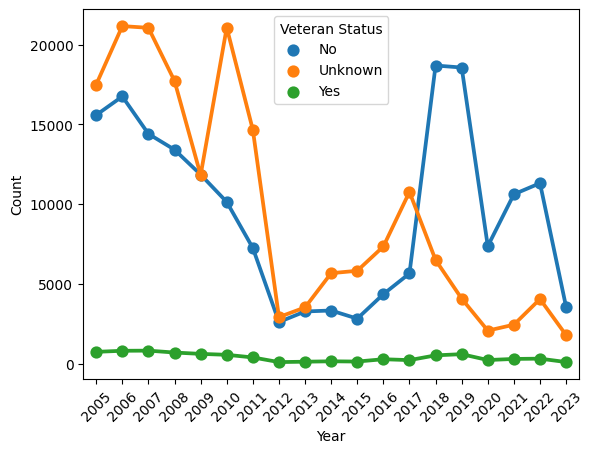

In [ ]:
ax = sns.pointplot(data=veteran2, x="Year", y="Count", hue="Veteran Status")
ax.set_xticklabels(labels=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=45)

# Quang's Visualization B

Quang's Visualization B

This plot is a bubbel chart that show the top 10 crimes that veterans commit the most throughout the year.

In [ ]:
import plotly.graph_objects as go

# Filter the DataFrame to include only rows where Veteran Status is 'Yes'
veterans_df = df[df['Veteran Status'] == 'Yes']

# Group the data by crime and count the number of occurrences
crime_counts = veterans_df['Holding Offense'].value_counts().head(10)  # Select top 10 crimes

# Create a color scale for the bubbles
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)',
          'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# Create the bubble chart
veterans_bub = go.Figure()

for i, (crime, count) in enumerate(zip(crime_counts.index, crime_counts.values)):
    veterans_bub.add_trace(go.Scatter(
        x=[crime],
        y=[count],
        mode='markers',
        marker=dict(
            size=[count],
            sizemode='area',
            sizeref=2 * max(crime_counts.values) / (100 ** 2),
            sizemin=4,
            color=colors[i]
        ),
        name=crime
    ))

# Set the chart title and axis labels
veterans_bub.update_layout(
    title='Top 10 Crimes Committed by Veterans',
    xaxis_title='Crime',
    yaxis_title='Number of Occurrences'
)

# Show the chart
veterans_bub.show()

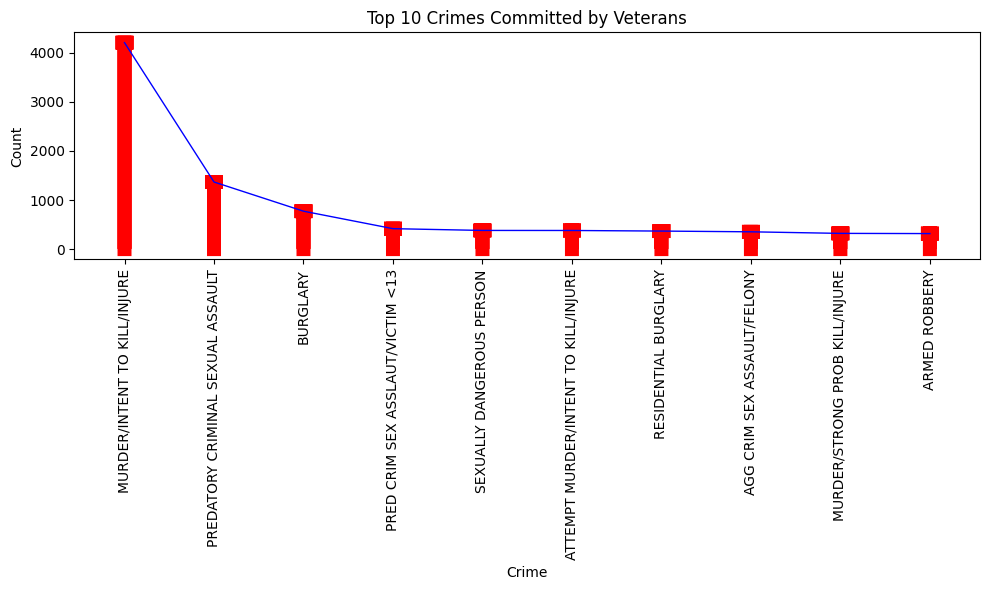

In [ ]:
top_10_crimes = crime_counts.head(10)

# Create the plot
plt.rcParams["figure.figsize"] = [10.00, 6.00]
plt.rcParams["figure.autolayout"] = True

x = np.arange(len(top_10_crimes))  # Generate x-axis values based on the number of crimes
y = top_10_crimes.values

plt.plot(x, y, c='b', lw=1)

# Add arrows for each crime count
for i in range(len(x)):
    plt.arrow(x[i], 0, 0, y[i], shape='full', lw=10,
              length_includes_head=True, head_width=0.2, color='r')

# Set the x-axis labels to the crimes
plt.xticks(x, top_10_crimes.index.tolist(), rotation=90)

# Set the plot title and labels
plt.title('Top 10 Crimes Committed by Veterans')
plt.xlabel('Crime')
plt.ylabel('Count')

# Show the plot
plt.show()

# ML Analysis 1 - Eddie Sanchez

This ML analysis performs a logistic regression classsification task on our dataset. Our goal is to use features such as "Race", "Holding Offense", and "Sentence Years" to predict "Admission Type".
Our analysis concludes that the model seems to perform better when it comes to predicting class 0 compared to predicting for class 1. As you can see from our results, predicting class 0 out performs class 1 in precision, recall, and f-1 scores.The overall accuracy obtained was 70%.

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

Data Cleaning

In [ ]:
ml1 = df[["Race", "Admission Type", "Holding Offense", "Sentence Years"]]

# years to be ints
ml1["Sentence Years"] = np.where(ml1["Sentence Years"] == "LIFE", 90, ml1["Sentence Years"])
ml1 = ml1[ml1["Sentence Years"] != "SDP"]
ml1 = ml1[ml1["Sentence Years"] != "DEATH"]
ml1 = ml1[ml1["Sentence Years"] != "PEND"]
ml1 = ml1[ml1["Sentence Years"] != " "]

ml1 = ml1[ml1["Sentence Years"].notna()]
ml1 = ml1[ml1["Race"].notna()]
ml1 = ml1[ml1["Admission Type"].notna()]
ml1 = ml1[ml1["Holding Offense"].notna()]

ml1["Sentence Years"] = ml1["Sentence Years"].astype(int)
ml1["Admission Type"] = np.where(ml1["Admission Type"].str.lower() == "discharged & recommitted", 1, 0)

ml1

,Race,Admission Type,Holding Offense,Sentence Years
596041,White,1,PREDATORY CRIMINAL SEXUAL ASSAULT,13
596042,White,1,ATTEMPT MURDER/INTENT TO KILL/INJURE,50
596043,White,1,ARMED ROBBERY,60
596044,Black,0,AGG CRIM SEX ASSAULT/WEAPON,60
596045,Black,0,MURDER/INTENT TO KILL/INJURE,90
...,...,...,...,...
641607,Black,0,AGG DOMESTIC BATTERY/STRANGLE,3
641608,Hispanic,0,DUI/4TH+/LIC SUSP OR REVOKE,4
641609,Black,0,MANU/DEL OTHER AMT NARC SCHED I&II,3
641610,Black,0,AGG CRIM SEX ASSAULT/WEAPON,22


In [ ]:
encoder = OneHotEncoder()
X = encoder.fit_transform(ml1[["Holding Offense", "Race", "Sentence Years"]])

y = ml1["Admission Type"]

X_train, X_test, y_train, y_test = tts(X, y)

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

y_predictions = classifier.predict(X_test)

print("Acc %:",metrics.accuracy_score(y_test, y_predictions)*100)
print("Report:")
print(metrics.classification_report(y_test, y_predictions))

Acc %: 67.19273496737789
Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      7062
           1       0.61      0.37      0.46      4280

    accuracy                           0.67     11342
   macro avg       0.65      0.61      0.61     11342
weighted avg       0.66      0.67      0.65     11342



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# ML Analysis 2 - Kacper Mocarski

For this machine learning analysis, we wanted to focus on the columns Admission Type, Crime Class, Holding Offense, and Sentence Years. We wanted to train the data on Admission Type, Crime Class, and Sentence Years to see if our classifier could predict the Holding Offense.

We used a linear SVC classification, and we fit the data using StandardScaler, purely because the data seemed too big and the classifier would take too long to run when I ran it with just SVC and no Standard Scalar.

The classifier gives us about a 76% accuracy on the Holding Offense it would give us. I tested it with an example input, and it returns "Burglary", which is the appropriate Holding Offense to return.

Getting the top ten crimes

In [ ]:
#Importing Libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [ ]:
top_ten_crimes = df[["Holding Offense"]]
top_ten_crimes = top_ten_crimes.groupby(["Holding Offense"]).size().reset_index(name="Count")
top_ten_crimes = top_ten_crimes.sort_values(by="Count", ascending=False)
top_ten_crimes = top_ten_crimes.head(10)
# top_ten_crimes

top_ten_list = top_ten_crimes["Holding Offense"].tolist()
# top_ten_list

Importing and Cleaning Data

In [ ]:
ml2 = df[["Admission Type", "Crime Class", "Holding Offense", "Sentence Years"]]

# years to be ints
ml2["Sentence Years"] = np.where(ml2["Sentence Years"] == "LIFE", 90, ml2["Sentence Years"])
ml2 = ml2[ml2["Sentence Years"] != "SDP"]
ml2 = ml2[ml2["Sentence Years"] != "DEATH"]
ml2 = ml2[ml2["Sentence Years"] != "PEND"]
ml2 = ml2[ml2["Sentence Years"] != " "]
ml2 = ml2[ml2["Sentence Years"].notna()]

ml2["Sentence Years"] = ml2["Sentence Years"].astype(int)

# get the top 10 crimes
ml2 = ml2[ml2["Holding Offense"].isin(top_ten_list)]

In [ ]:
# Splitting Data into Training and Testing data
encoder = OneHotEncoder()
X = encoder.fit_transform(ml2[["Admission Type", "Crime Class", "Sentence Years"]])

y = ml2["Holding Offense"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=30/100, random_state=None)

# SVM Classifier
classifier = LinearSVC()

sc = StandardScaler(with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train
classifier.fit(X_train, y_train.ravel())

# Predictions
y_predictions = classifier.predict(X_test)

#Accuracy
print("Acc %:",metrics.accuracy_score(y_test, y_predictions)*100)

Acc %: 75.63451776649747


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
# Testing with data directly from trained and tested data
test_data = [["Direct from court", "Class 2", 4]]
test_data_enc = encoder.transform(test_data)

print(classifier.predict(test_data_enc))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



ValueError: ignored

# ML Analysis 3 - Kacper

Predicting Sentence Length

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Cleaning up data
# Changing sentence years to be only numeric, then separating them into categories of SHORT, MED, and LONG

ml3 = df[["Holding Offense", "Custody Date", "Sentencing County"]]

ml3 = ml3[ml3["Holding Offense"].notna()]
ml3 = ml3[ml3["Custody Date"].notna()]
ml3 = ml3[ml3["Sentencing County"].notna()]

encoder = OneHotEncoder()
X = encoder.fit_transform(ml3[["Holding Offense", "Custody Date"]])
y = ml3["Sentencing County"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=30/100, random_state=None)

#Decision Tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train.ravel())

#predict
pred = classifier.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, pred)
classification = classification_report(y_test, pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.4525237746891002
Classification Report:
               precision    recall  f1-score   support

       Adams       0.08      0.15      0.10       102
   Alexander       0.11      0.07      0.08        15
        Bond       0.00      0.00      0.00        25
       Boone       0.00      0.00      0.00        62
       Brown       0.00      0.00      0.00         3
      Bureau       0.00      0.00      0.00        31
     Calhoun       0.00      0.00      0.00         3
     Carroll       0.00      0.00      0.00        13
        Cass       0.00      0.00      0.00        11
   Champaign       0.07      0.04      0.05       293
   Christian       0.00      0.00      0.00        35
       Clark       0.07      0.06      0.07        16
        Clay       0.13      0.07      0.09        29
     Clinton       0.08      0.03      0.05        32
       Coles       0.11      0.05      0.07        78
        Cook       0.54      0.88      0.67      6763
    Crawford       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# ML Analysis 4

Identify patterns based on release dates to show when there would be more prisoners released allowing for institutions to prepare accordingly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78324b03ab90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._h

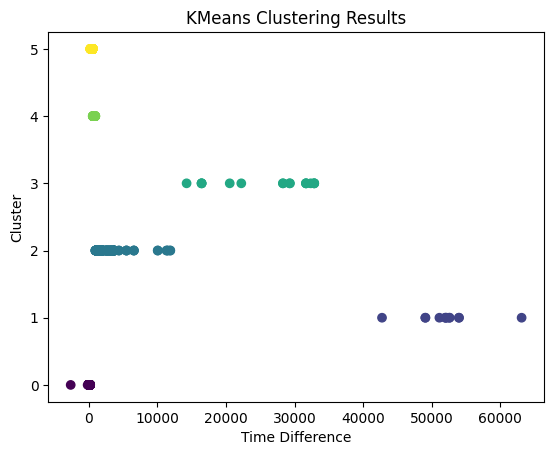

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

release_data = df[['Projected Mandatory Supervised Release (MSR) Date3', 'Projected Discharge Date3']]
release_data = release_data.dropna(subset=['Projected Mandatory Supervised Release (MSR) Date3', 'Projected Discharge Date3'])
release_data['Projected Mandatory Supervised Release (MSR) Date3'] = pd.to_datetime(release_data['Projected Mandatory Supervised Release (MSR) Date3'],errors = 'coerce')
release_data['Projected Discharge Date3'] = pd.to_datetime(release_data['Projected Discharge Date3'],errors = 'coerce')

release_data['Time Difference'] = (release_data['Projected Discharge Date3'] - release_data['Projected Mandatory Supervised Release (MSR) Date3']).dt.days

features = release_data[['Time Difference']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# change her for the cluster size
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
features_scaled = np.nan_to_num(features_scaled, nan=0, posinf=0, neginf=0)
release_data['Cluster'] = kmeans.fit_predict(features_scaled)

release_data

plt.scatter(release_data['Time Difference'], release_data['Cluster'], c=release_data['Cluster'], cmap='viridis')
plt.xlabel('Time Difference')
plt.ylabel('Cluster')
plt.title('KMeans Clustering Results')
plt.show()



# ML Analysis 5

In [ ]:
print(df['Race'].unique())
print(df['Sentence Months'].unique())

['White' 'Black' 'Hispanic' 'American Indian' 'Asian' 'Unknown'
 'Bi-Racial']
['00' ' ' '06' '42' '30' '78' '09' '73' '54' '18' '07' '24' '03' '84' '15'
 '40' '90' '13' '52' '66' '36' '39' '10' '76' '20' '08' '45' '68' '72'
 '14' '04' '12' '46' '02' '01' '05' '21' '48' '44' '92' '17' '75' '34'
 '37' '28' '49' '27' '55' '57' '33' '88' '38' '60' '16' '23' '96' '22'
 '98' '99' '70' '50' '26' '93' '51' '25' '56' '43' '32' '63' '82' '35'
 '19' '11' '71' '81' '58']


# ML Analysis 6 -Quang Le


In this ML we will dive into to accuracy of ML model in predicting the crime class based on the admission type, county, and age

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
columns = ['Admission Type', 'Sentencing County', 'Age', 'Crime Class']
analysis_df = df[columns]
print(analysis_df)

        Admission Type  Sentencing County  Age Crime Class
596041               3                100   79     Class X
596042               3                 39   74     Class X
596043               3                 15   77     Class X
596044               6                 15   69     Class X
596045               2                 98   67      Murder
...                ...                ...  ...         ...
641607               2                 36   40     Class 2
641608               2                 36   64     Class 2
641609               2                 36   33     Class 2
641610               2                 15   37     Class X
641611               2                 15   27     Class 1

[45566 rows x 4 columns]


First of all we will process the data


In [ ]:
#Start training the model
le = LabelEncoder()
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Sentencing County'] = le.fit_transform(df['Sentencing County'])
X = df[['Admission Type', 'Sentencing County', 'Age']]
y = df['Crime Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.30897520298441955

From this ML we can see that the model's predictions are not very accurate and may not be reliable for making accurate predictions on unseen data

# ML Analysis 7 -Quang Le

Predict the likelihood someone will reoffend with training model

In [ ]:
# Create a new DataFrame with selected columns
new_df = df[["Sex", "Race", "Veteran Status", "Sentence Years", "Sentence Months", "Holding Offense"]].copy()
new_df  = new_df [new_df ["Sentence Years"] != "SDP"]
new_df  = new_df [new_df ["Sentence Years"] != "DEATH"]
new_df  = new_df [new_df ["Sentence Years"] != "PEND"]
new_df  = new_df [new_df ["Sentence Years"] != "LIFE"]
new_df  = new_df [new_df ["Sentence Years"] != " "]
new_df = new_df[new_df["Sentence Years"].notna()]

# Encode categorical variables
label_encoder = LabelEncoder()
new_df['Sex'] = label_encoder.fit_transform(new_df['Sex'])
new_df['Race'] = label_encoder.fit_transform(new_df['Race'])
new_df['Veteran Status'] = label_encoder.fit_transform(new_df['Veteran Status'])
new_df['Holding Offense'] = label_encoder.fit_transform(new_df['Holding Offense'])

# Split the data into training and testing sets
X = new_df.drop('Holding Offense', axis=1)  # Features
y = new_df['Holding Offense']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the real values
print("Real values:")
print(y_test)

# Print the average accuracy
print("Average accuracy:", accuracy)

# Print the classification report
print("Classification report:")
print(report)

Real values:
607221    341
615579    434
598353     22
617413    934
612329    342
         ... 
633649    307
629437     83
631312    218
597807    840
607643     28
Name: Holding Offense, Length: 8756, dtype: int64
Average accuracy: 0.19986295111923252
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        37
          16       0.00      0.00      0.00         4
          17       0.08      0.01      0.02       104
          18       0.00      0.00      0.00        21
          20       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

# Extra Component - Kacper & Raudel

Seeing which dates have the most committed crimes

https://python.plainenglish.io/interactive-calendar-heatmaps-with-plotly-the-easieast-way-youll-find-5fc322125db7



In [ ]:
pip install plotly-calplot

In [ ]:
excomp = df[["Custody Date"]]

excomp["Custody Date"] = pd.to_datetime(excomp["Custody Date"], errors="coerce")
excomp = excomp[excomp["Custody Date"].notna()]

excomp["Custody Date"] = excomp["Custody Date"].apply(lambda x: x.replace(year=2020))
excomp["Count"] = excomp.groupby("Custody Date")["Custody Date"].transform("count")
excomp = excomp.sort_values(by="Custody Date", ascending=True)
excomp = excomp.drop_duplicates(subset="Custody Date")

excomp


In [ ]:
from plotly_calplot import calplot
fig = calplot(excomp,
              x="Custody Date",
              y="Count",
              colorscale="purples",
              month_lines_width=3,
              month_lines_color="#000")
fig.show()

# Reflection

What is the most challenging part of the project that you’ve encountered so far?
* The most challenging part was getting data cleaned to be able to create visualizations for. A lot of the columns' values differed depending on what year of the data. For example, some of the Date of Birth values were 19900101.0 and the others were "2023-01-01 00:00:00". It was a hassle to clean the data because we didn't realize until later. We cleaned the Sentence Date and Custody Data because it had the same issue.
* Another challenging issue was that this data set had inconsistent values for certain columns. For example, in the County section, there are inputs that have DeKalb as the county, and others that have Dekalb. These inconsistencies just mean that we needed to catch all of these details and fix them.

What are your initial insights?
* So far we are seeing that some of the hypotheses we are testing are true, to some extent. We are seeing a lot of important ideas, especially with the recommitted crimes. A lot of this data (and the graphs supporting us) will help us draw conclusions and come up with potential areas of trouble that need better solutions than jail.

Are there any concrete results you can show at this point? If not, why not?
* There are some concrete results that we can show. We are going to need to look more into the data for veterans (potentially from a different source) to see whether or not there is an actualy problem with incarcerations for veterans. Another area we need to look more into would be the racial disparities. It seems like there isn't a lot of racial disparity based on the top 5 committed crimes, but those seem to be more severe crimes (like murder). It would be interesting to see if there is any difference in lower level crimes and compare that to the data we have.

Going forward, what are the current biggest problems you’re facing?
Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
* We believe that we are on track with our project. We have already gained a good insight from the data we have, but there is for sure areas that we can look into deeper and try to unravel more findings. Our current biggest problems are dealing with the data correctly, because the data is valuable and contains useful information, but we need to make sure that we are using it to the best ability possible.

Given your initial exploration of the data, is it worth proceeding with your project,
why? If not, how will you move forward (method, data etc)?
* We believe that our data is worth proceeding with our project.

# Next Steps

Our next steps for this final month is to continue learning more from our data. Like we mentioned in the reflection, there are some futher ideas we can pursue based on some of the findings and our charts.

We will need to run more machine learning statistics on some of the data, so we will figure out what insights we want to learn and outline it appropriately. We also want to dive deeper into some of the visualizations, specifically the veteran, racial disparity, and reincarceration graphs. Is there further details we can uncover, and if not, why not?

Other than that, we will continue to uncover results to show that our solution worked well or not, and we will be wrapping everything up to be able to have a presentable demonstration of all our work, findings, etc.